In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
raw_data = sns.load_dataset('titanic')
print(raw_data)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:
print(raw_data.isnull().sum())  #age랑 deck가 문제임

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
 #deck컬럼 삭제
 clean_data = raw_data.dropna(axis=1, thresh=500) #none값이500 개 이상인 컬럼삭제
 print(clean_data.columns)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [ ]:
#age는 평균나이로 대체
mean_age = clean_data['age'].mean()
print(mean_age)

29.69911764705882


In [ ]:
clean_data['age'].fillna(mean_age, inplace=True)
print(clean_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#중복되는 컬럼 삭제
clean_data.drop(['embark_town', 'alive','who'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
clean_data.info()
#embarked열에 값이 부족함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   adult_male  891 non-null    bool    
 10  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(2)
memory usage: 58.6+ KB


In [ ]:
#위에 값으로 채워주기
clean_data['embarked'].fillna(
    method='ffill',inplace=True)
#다시 null값 보면 0개 확인
print(clean_data.isnull().sum())

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
adult_male    0
alone         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#target인 survived만 빼내기
label=list(clean_data.columns)
keep = label.pop(0)
target = clean_data[[keep]]
training_data = clean_data[label]
print(training_data.head())
print(target.head())

   pclass     sex   age  sibsp  parch     fare embarked  class  adult_male  \
0       3    male  22.0      1      0   7.2500        S  Third        True   
1       1  female  38.0      1      0  71.2833        C  First       False   
2       3  female  26.0      0      0   7.9250        S  Third       False   
3       1  female  35.0      1      0  53.1000        S  First       False   
4       3    male  35.0      0      0   8.0500        S  Third        True   

   alone  
0  False  
1  False  
2   True  
3  False  
4   True  
   survived
0         0
1         1
2         1
3         1
4         0


In [ ]:
print(keep)
print(label)

survived
['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'adult_male', 'alone']


In [ ]:
training_data = clean_data[label]
target = clean_data[[keep]]

print(training_data)
print(target)

     pclass     sex        age  sibsp  parch     fare embarked   class  \
0         3    male  22.000000      1      0   7.2500        S   Third   
1         1  female  38.000000      1      0  71.2833        C   First   
2         3  female  26.000000      0      0   7.9250        S   Third   
3         1  female  35.000000      1      0  53.1000        S   First   
4         3    male  35.000000      0      0   8.0500        S   Third   
..      ...     ...        ...    ...    ...      ...      ...     ...   
886       2    male  27.000000      0      0  13.0000        S  Second   
887       1  female  19.000000      0      0  30.0000        S   First   
888       3  female  29.699118      1      2  23.4500        S   Third   
889       1    male  26.000000      0      0  30.0000        C   First   
890       3    male  32.000000      0      0   7.7500        Q   Third   

     adult_male  alone  
0          True  False  
1         False  False  
2         False   True  
3         F

In [ ]:
print(training_data[['sex','class']].head())

      sex  class
0    male  Third
1  female  First
2  female  Third
3  female  First
4    male  Third


In [ ]:
training_data['sex'].replace({'male':0, 'female':1}, inplace=True)
training_data['class'].replace({'First':1, 'Second':2, 'Third':3}, inplace=True)
training_data['embarked'].replace({'S':1, 'C':2, 'Q':3}, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print(training_data['embarked'].unique())

[1 2 3]


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      891 non-null    int64  
 1   sex         891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   embarked    891 non-null    int64  
 7   class       891 non-null    int64  
 8   adult_male  891 non-null    bool   
 9   alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB


In [ ]:
print(target[keep].sum())

342


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)   #numpy의 ndarray가 되어있음 그래서 df로 바꿔줘야함
print(type(scaled_data))
scaled_data = pd.DataFrame(scaled_data, columns=label)
print(scaled_data.head())   #평균이 0이고 표준편차가 1인 정규분포를따르는데이터, 표준정규분포

<class 'numpy.ndarray'>
     pclass       sex       age     sibsp     parch      fare  embarked  \
0  0.827377 -0.737695 -0.592481  0.432793 -0.473674 -0.502445 -0.571898   
1 -1.566107  1.355574  0.638789  0.432793 -0.473674  0.786845  0.995982   
2  0.827377  1.355574 -0.284663 -0.474545 -0.473674 -0.488854 -0.571898   
3 -1.566107  1.355574  0.407926  0.432793 -0.473674  0.420730 -0.571898   
4  0.827377 -0.737695  0.407926 -0.474545 -0.473674 -0.486337 -0.571898   

      class  adult_male     alone  
0  0.827377    0.811922 -1.231645  
1 -1.566107   -1.231645 -1.231645  
2  0.827377   -1.231645  0.811922  
3 -1.566107   -1.231645 -1.231645  
4  0.827377    0.811922  0.811922  


In [ ]:
print(scaled_data.describe().T)   #평균은 0, 표준편차는1

            count          mean       std       min       25%       50%  \
pclass      891.0 -2.031048e-16  1.000562 -1.566107 -0.369365  0.827377   
sex         891.0  3.162453e-16  1.000562 -0.737695 -0.737695 -0.737695   
age         891.0  2.562796e-16  1.000562 -2.253155 -0.592481  0.000000   
sibsp       891.0  3.456519e-16  1.000562 -0.474545 -0.474545 -0.474545   
parch       891.0  6.716164e-17  1.000562 -0.473674 -0.473674 -0.473674   
fare        891.0 -4.373606e-17  1.000562 -0.648422 -0.489148 -0.357391   
embarked    891.0  1.834173e-16  1.000562 -0.571898 -0.571898 -0.571898   
class       891.0 -2.031048e-16  1.000562 -1.566107 -0.369365  0.827377   
adult_male  891.0 -1.779347e-16  1.000562 -1.231645 -1.231645  0.811922   
alone       891.0 -2.561861e-16  1.000562 -1.231645 -1.231645  0.811922   

                 75%       max  
pclass      0.827377  0.827377  
sex         1.355574  1.355574  
age         0.407926  3.870872  
sibsp       0.432793  6.784163  
parch    

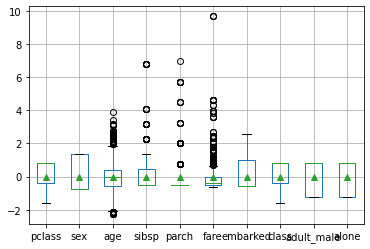

In [ ]:
scaled_data.boxplot(column=label,
                    showmeans=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
#데이터중 30프로를 떼서 나중에 테스트용으로 씀
X_train, X_test, Y_train, Y_test = train_test_split(
    scaled_data, target, test_size=0.30)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)

X_train: (623, 10)
X_test: (268, 10)
Y_train: (623, 1)
Y_test: (268, 1)


In [ ]:
model = Sequential()
model.add(Dense(512, input_dim=10, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5632      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [ ]:
model.compile(loss='mse', optimizer='adam',
              metrics=['binary_accuracy'])
fit_hist = model.fit(X_train, Y_train, batch_size=50, epochs=7,
                     validation_split=0.2, verbose=1)

Epoch 1/7
10/10 [==============================] - 1s 42ms/step - loss: 0.1779 - binary_accuracy: 0.7530 - val_loss: 0.1343 - val_binary_accuracy: 0.8240
Epoch 2/7
10/10 [==============================] - 0s 7ms/step - loss: 0.1316 - binary_accuracy: 0.8213 - val_loss: 0.1234 - val_binary_accuracy: 0.8560
Epoch 3/7
10/10 [==============================] - 0s 7ms/step - loss: 0.1292 - binary_accuracy: 0.8153 - val_loss: 0.1275 - val_binary_accuracy: 0.8240
Epoch 4/7
10/10 [==============================] - 0s 7ms/step - loss: 0.1277 - binary_accuracy: 0.8233 - val_loss: 0.1245 - val_binary_accuracy: 0.8560
Epoch 5/7
10/10 [==============================] - 0s 8ms/step - loss: 0.1258 - binary_accuracy: 0.8233 - val_loss: 0.1188 - val_binary_accuracy: 0.8560
Epoch 6/7
10/10 [==============================] - 0s 7ms/step - loss: 0.1210 - binary_accuracy: 0.8373 - val_loss: 0.1244 - val_binary_accuracy: 0.8400
Epoch 7/7
10/10 [==============================] - 0s 7ms/step - loss: 0.1209 - b

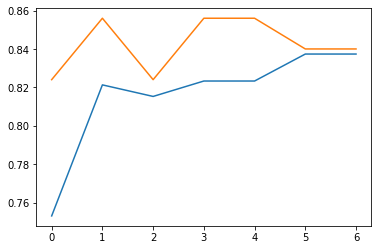

In [ ]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])  #검증정확도

plt.show()

In [ ]:
#검증할때 쓰는 evaluate   진행사항 안보려고 verbose=0
score = model.evaluate(X_test, Y_test, verbose=0)  #loss랑 accuracy만 구함 testset에 대한 학습은 하지 않음
print('Keras DNN model loss:', score[0])  #evaluate는 리스트로 값을 반환, 0이 loss, 1이 accuracy
print('Keras DNN model accuracy:', score[1])

Keras DNN model loss: 0.13616763055324554
Keras DNN model accuracy: 0.8208954930305481


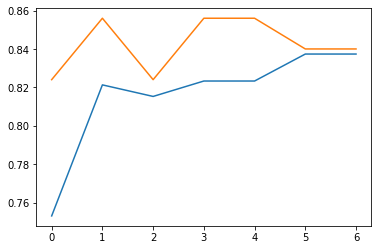

In [ ]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])  #검증정확도

plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('loss',score[0])
print('accuracy',score[1])

loss 0.13616763055324554
accuracy 0.8208954930305481
